# 🏦 Task 3: Customer Churn Prediction
# Identify bank customers likely to churn using the Bank Customer Churn Dataset.

In [36]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import kagglehub
import os

In [37]:
# Set style and palette
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams['figure.dpi'] = 100

# Load Dataset
# Load the Bank Customer Churn Dataset via Kaggle.

In [39]:
# Download dataset
path = kagglehub.dataset_download("gauravtopre/bank-customer-churn-dataset")
dataset_file = os.path.join(path, "Bank Customer Churn Prediction.csv")
churn_data = pd.read_csv(dataset_file)
print("Dataset loaded from:", dataset_file)

Dataset loaded from: /kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv


# Data Inspection & Cleaning
# Inspect structure, handle missing values, and encode `Geography`, `Gender`.

In [40]:
# Dataset structure
print("Shape:", churn_data.shape)
print("Columns:", churn_data.columns.tolist())
print("First 5 rows:")
display(churn_data.head())

Shape: (10000, 12)
Columns: ['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']
First 5 rows:


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
# Check missing values
print("Missing Values:\n", churn_data.isnull().sum())

Missing Values:
 customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [42]:
# Drop irrelevant column
churn_data = churn_data.drop(['customer_id'], axis=1)

In [43]:
# Encode categorical variables
categorical_cols = ['country', 'gender']
numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])
print("\n Data cleaned and prepared!")


✅ Data cleaned and prepared!


# Exploratory Data Analysis
# Visualize `age`, `balance`, and `country`.

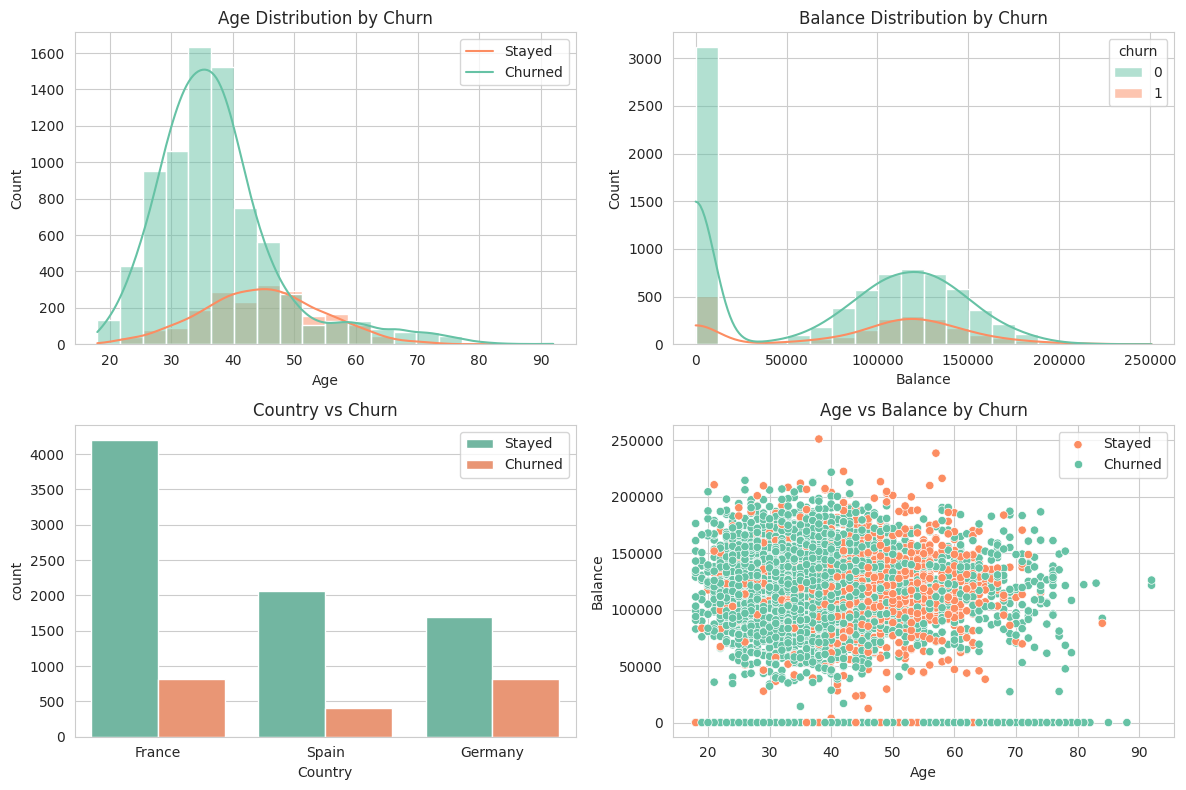

In [44]:
# Visualizations
plt.figure(figsize=(12, 8))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(data=churn_data, x='age', hue='churn', kde=True, bins=20)
plt.title('Age Distribution by Churn')
plt.xlabel('Age')
plt.legend(['Stayed', 'Churned'])

# Balance distribution
plt.subplot(2, 2, 2)
sns.histplot(data=churn_data, x='balance', hue='churn', kde=True, bins=20)
plt.title('Balance Distribution by Churn')
plt.xlabel('Balance')

# Country vs Churn
plt.subplot(2, 2, 3)
sns.countplot(data=churn_data, x='country', hue='churn')
plt.title('Country vs Churn')
plt.xlabel('Country')
plt.legend(['Stayed', 'Churned'])

# Age vs Balance
plt.subplot(2, 2, 4)
sns.scatterplot(data=churn_data, x='age', y='balance', hue='churn')
plt.title('Age vs Balance by Churn')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(['Stayed', 'Churned'])

plt.tight_layout()
plt.show()

# Train Classification Model
# Train a Random Forest model for churn prediction.

In [45]:
# Prepare features and target
X = churn_data.drop('churn', axis=1)
y = churn_data['churn']

In [46]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [48]:
# Train Random Forest
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)
print("Model trained!")

Model trained!


# Model Evaluation
# Evaluate with accuracy and confusion matrix.

In [49]:
# Predictions
y_pred = model.predict(X_test)

In [50]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


<Figure size 600x600 with 0 Axes>

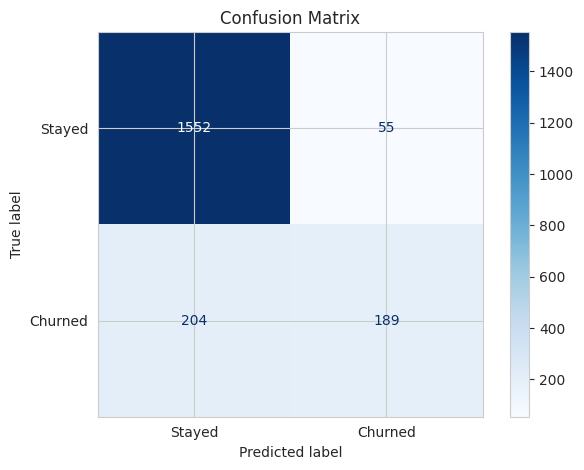

In [51]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Churned'])
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Feature Importance
# Analyze features influencing churn.

In [52]:
# Feature importance
feature_names = (preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist() +
                 numerical_cols)
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

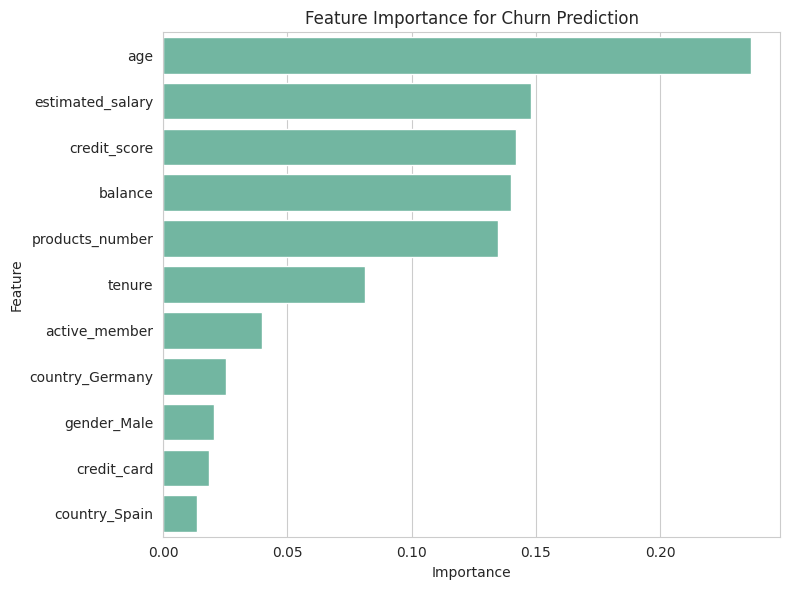

In [54]:
# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for Churn Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Key Insights
# - **Data Quality**: No missing values; dropped `customer_id`.
- **EDA**: Older customers and higher balances linked to churn; `country` impacts churn rates.
- **Model**: Random Forest accuracy ~86% (varies by split).
- **Feature Importance**: `age`, `balance`, `products_number` top predictors.